# Stationarity and Correlation Analysis

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# What is Stationarity?

#### A stationary time series is one whose properties do not depend on the time at which the series is observed.

Hyndman, R.J., & Athanasopoulos, G. (2018) Forecasting: principles and practice, 2nd edition, OTexts: Melbourne, Australia. OTexts.com/fpp2/stationarity. Accessed on Dec 4, 2020.

Non-stationarity is often observed through changing mean or variance in the time series.

## Basic Examples

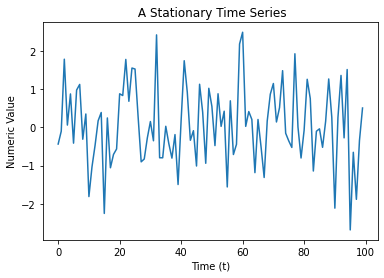

In [258]:
stationary = np.random.randn(100)

plt.plot(stationary)
plt.xlabel("Time (t)")
plt.ylabel("Numeric Value")
plt.title(" A Stationary Time Series")
plt.show()

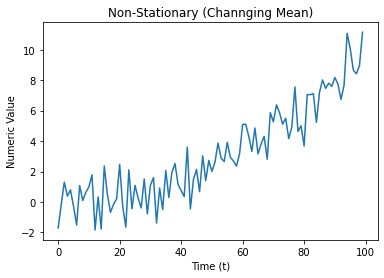

In [259]:
t = np.arange(0,100)
stationary = np.random.randn(100) + 0.001*t**2

plt.plot(stationary)
plt.xlabel("Time (t)")
plt.ylabel("Numeric Value")
plt.title("Non-Stationary (Channging Mean)")
plt.show()

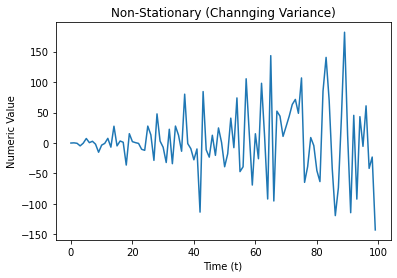

In [260]:
t = np.arange(0,100)
stationary = np.random.randn(100)*t

plt.plot(stationary)
plt.xlabel("Time (t)")
plt.ylabel("Numeric Value")
plt.title("Non-Stationary (Channging Variance)")
plt.show()

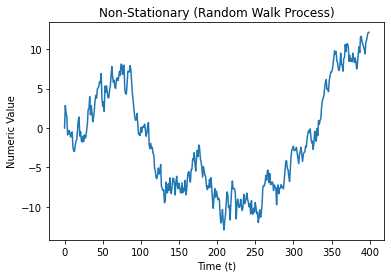

In [261]:
t = np.arange(0,400)
y = np.empty(400)
# Add a Random repeating pattern
season = np.concatenate([np.arange(0,100), np.arange(0,100),np.arange(0,100),np.arange(0,100)])
for i in range(1,400):
    y[i] = y[i-1] + np.random.randn()
    

plt.plot(y)
plt.xlabel("Time (t)")
plt.ylabel("Numeric Value")
plt.title("Non-Stationary (Random Walk Process)")
plt.show()

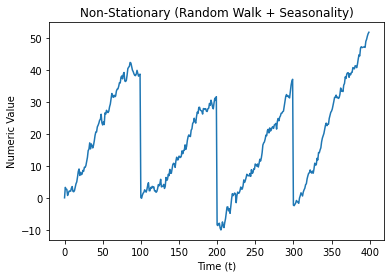

In [262]:
y = y + 0.4*season

plt.plot(y)
plt.xlabel("Time (t)")
plt.ylabel("Numeric Value")
plt.title("Non-Stationary (Random Walk + Seasonality)")
plt.show()

# Why is Stationarity Important? A Motivating Example

Imagine someone trying to lose weight over a 10 week period.
For this example, assume the person needs to eat less than 2500kcal per day to lose weight.

They mostly stick to their diet throughout the 10 week period, but during last 2 weeks they eat a little more than usual.

Lets do a correlation analysis between food eaten and weight.

In [263]:
avg_kcal_eaten = np.array([1500, 1600, 1550, 1750, 1810, 1860, 1650, 1500, 1970, 2000])
maintenance = 2500
weight_loss = ((2500 - avg_kcal_eaten)*7)/7700
weeks = np.arange(0,10)


weight = np.empty(len(weeks))
weight[0] = 70
for w in weeks:
    if w != 0:
        this_week = weight[w-1] - weight_loss[w]
        weight[w] = this_week
        
# Create a dataframe
df = pd.DataFrame({"weight":weight,"avg_kcal_eaten":avg_kcal_eaten}, index=weeks, dtype="float64")

## View the Dataset

In [264]:
df

,weight,avg_kcal_eaten
0,70.000000,1500.0
1,69.181818,1600.0
2,68.318182,1550.0
3,67.636364,1750.0
4,67.009091,1810.0
5,66.427273,1860.0
6,65.654545,1650.0
7,64.745455,1500.0
8,64.263636,1970.0
9,63.809091,2000.0


## Plot the Two Series

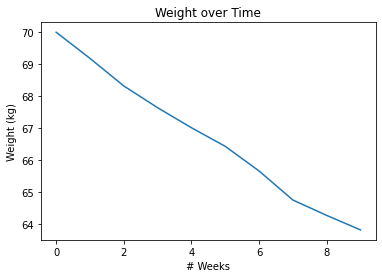

In [265]:
plt.plot(df['weight'])
plt.xlabel("# Weeks")
plt.ylabel("Weight (kg)")
plt.title("Weight over Time")
plt.show()

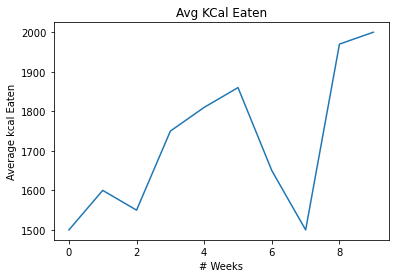

In [266]:
plt.plot(df['avg_kcal_eaten'])
plt.xlabel("# Weeks")
plt.ylabel("Average kcal Eaten")
plt.title("Avg KCal Eaten")
plt.show()

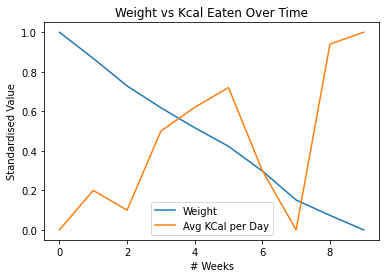

In [267]:
def standardise(x):
    x = np.array(x)
    min_x = np.min(x)
    max_x = np.max(x)
    for i in range(0,x.shape[0]):
        x[i] = (x[i] - min_x) / (max_x - min_x)
    return x


plt.plot(standardise(df['weight']))
plt.plot(standardise(df['avg_kcal_eaten']))
plt.xlabel("# Weeks")
plt.ylabel("Standardised Value")
plt.title("Weight vs Kcal Eaten Over Time")
plt.legend(["Weight","Avg KCal per Day"])
plt.show()

## Correlation

In [268]:
df.corr()

,weight,avg_kcal_eaten
weight,1.000000,-0.619909
avg_kcal_eaten,-0.619909,1.000000


<font color='red'><b> There is a negative correlation between kcal eaten and weight loss. According to our correlation analysis, weight loss happens when you eat more! How can this be? </b></font>

### Why is this happening?
When the target variable is non-stationary the results are often unexpected or incorrect. Lets look at the calculation of the correlation to see why this is the case.

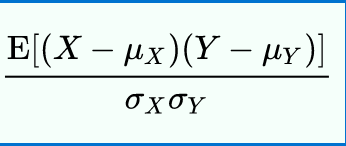

The formula above is the **Pearson correlation.**

Notice that the formula takes each observation (xi) and subtracts the mean (ux). What does this mean for us? If there is a trend, the true "mean" would change after every new observation, but the formula doesnt take this into account. 

Therefore it assumes a constant, unchanging mean. The calculated mean cuts a line right through the middle and effectively, we end up using the 2 sections above and below the line.

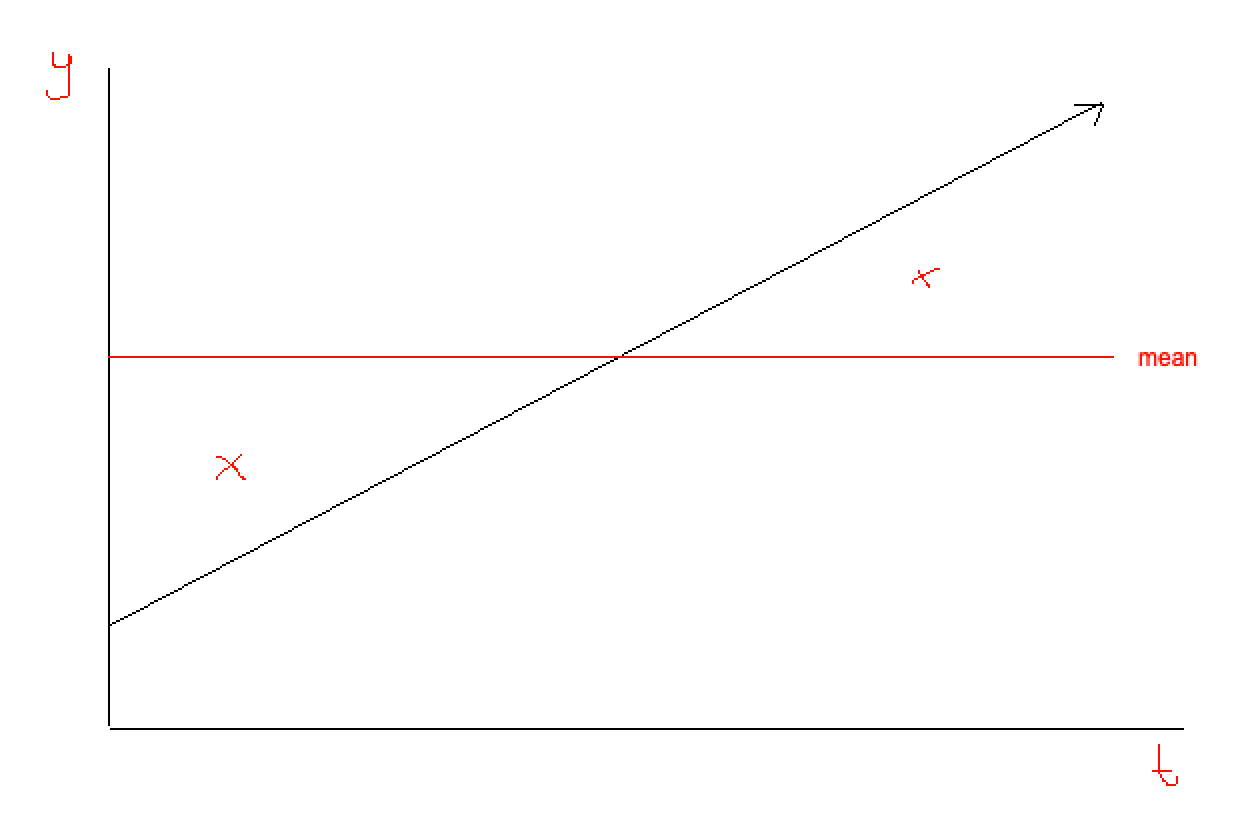

In order to correct for this issue, we need to do something called 'detrending'. Effectively, we want to first remove the increasing trend from the series. In the next section, Munji will show some methods to do this on real problems.

For now, let us approach the problem logically and just say that is not the absolute value of the weight that is important to us, but rather the rate of weight loss per week. By taking the rate of change, we will detrend the time series. This method is called 'differencing'.


### Lets look at the weight loss per week.

In [269]:
df['weight_diff'] = df['weight'].diff()

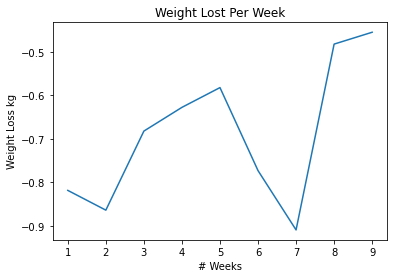

In [270]:
plt.plot(df['weight_diff'])
plt.xlabel("# Weeks")
plt.ylabel("Weight Loss kg")
plt.title("Weight Lost Per Week")
plt.show()

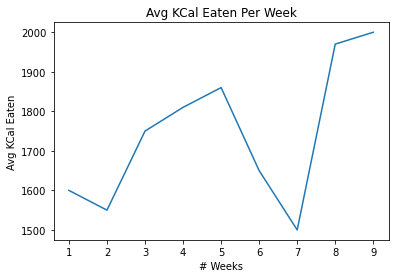

In [271]:
plt.plot(df['avg_kcal_eaten'].iloc[1:])
plt.xlabel("# Weeks")
plt.ylabel("Avg KCal Eaten")
plt.title("Avg KCal Eaten Per Week")
plt.show()

In [272]:
df.corr()

,weight,avg_kcal_eaten,weight_diff
weight,1.000000,-0.619909,-0.517035
avg_kcal_eaten,-0.619909,1.000000,1.000000
weight_diff,-0.517035,1.000000,1.000000


<font color='red'><b> Weight loss per week is now positively correlated with the calories eaten, as expected. </b></font>

# A Typical Correlation Analysis


- How did my firm's intervention (event) affect our sales/output/profit?

In [282]:
np.random.seed(100)
t=np.arange(0,10)
intervention = np.array([0,0,1,0,0,0,0,0,0,0])
intervention_lag_1 = np.array([0,0,0,1,0,0,0,0,0,0])

sales = 0.1*t + intervention*0.2 + intervention_lag_1*0.1 + np.random.rand(10)*0.1

df = pd.DataFrame({"Sales":sales,'Intervention':intervention,'Intervention_Lag_1':intervention_lag_1,'Time':t})

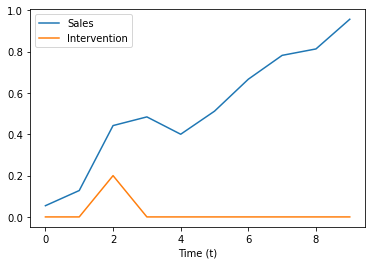

In [283]:
plt.plot(sales)
plt.plot(intervention*0.2)
plt.xlabel("Time (t)")
plt.legend(['Sales', "Intervention"])
plt.show()

In [284]:
df.corr()

,Sales,Intervention,Intervention_Lag_1,Time
Sales,1.000000,-0.098893,-0.048089,0.965251
Intervention,-0.098893,1.000000,-0.111111,-0.290129
Intervention_Lag_1,-0.048089,-0.111111,1.000000,-0.174078
Time,0.965251,-0.290129,-0.174078,1.000000


In [285]:
# Correlation Analysis
df_diff = df.diff().copy()

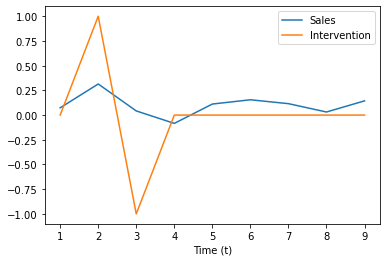

In [286]:
plt.plot(df_diff['Sales'])
plt.plot(df_diff['Intervention'])
plt.xlabel("Time (t)")
plt.legend(['Sales', "Intervention"])
plt.show()

In [287]:
df_diff.corr()

,Sales,Intervention,Intervention_Lag_1,Time
Sales,1.000000,0.628532,0.290602,NaN
Intervention,0.628532,1.000000,-0.500000,NaN
Intervention_Lag_1,0.290602,-0.500000,1.000000,NaN
Time,NaN,NaN,NaN,NaN


## Statistical Tests for Stationarity

**Augmented Dickey Fuller Test (ADF)**

https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test
    
**KPSS Test**

https://en.wikipedia.org/wiki/KPSS_test

**ACF and PACF Plots (Autocorrelation, Partial Autocorrelation)**

https://en.wikipedia.org/wiki/Partial_autocorrelation_function

https://otexts.com/fpp2/non-seasonal-arima.html
